## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

vehicles = pd.read_csv('../datasets/vehicles.csv', sep=',')

In [3]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [4]:
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles['odometer'].mean())

vehicles_train, vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=42)

In [5]:
features = ['odometer'] 
dt_regression = DecisionTreeRegressor(max_depth = 10) # Increase max_depth to see effect in the plot
dt_regression.fit(vehicles_train[features], vehicles_train['price'])

DecisionTreeRegressor(max_depth=10)

In [6]:
# De RMSE op de training set is hoger, omdat het model getrained is op die set. Dit zorgt voor minder errors in die set.

predictionsOnTrainset = dt_regression.predict(vehicles_train[features])
predictionsOnTestset = dt_regression.predict(vehicles_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, vehicles_train.price)
rmseTest = calculate_rmse(predictionsOnTestset, vehicles_test.price)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 15954290.096245378
RMSE on test set 11315975.23673373


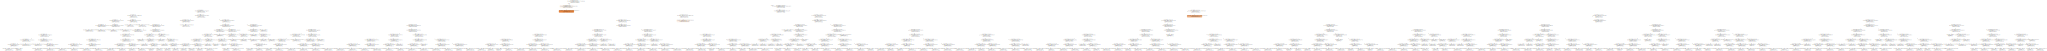

In [7]:
plot_tree_regression(dt_regression, features)